# Artificial Neural Networks

In [143]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd

SEED = 42

def get_python_version():
    import sys
    return sys.version

def get_tensorflow_version():
    import tensorflow as tf
    return tf.__version__

print(f'Python: {get_python_version()}\nTensorflow: {get_tensorflow_version()}')

Python: 3.10.8 (main, Nov 14 2022, 00:00:00) [GCC 12.2.1 20220819 (Red Hat 12.2.1-2)]
Tensorflow: 2.11.0


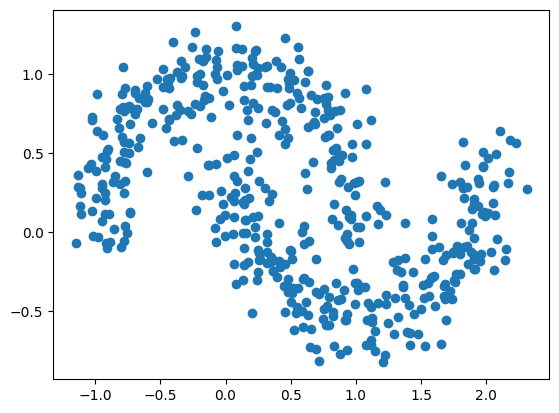

In [144]:
from sklearn import datasets  
from sklearn.model_selection import train_test_split

x, y = datasets.make_moons(500, noise = 0.15)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=SEED)

plt.scatter(x[:, 0], x[:, 1])
plt.show()

In [145]:
from keras.models import Sequential

In [146]:
from keras.layers import Dense, Activation
model = Sequential()
model.add(Dense(100, input_dim = 2, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics= ['accuracy'])

In [147]:
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 100)               300       
                                                                 
 dense_33 (Dense)            (None, 50)                5050      
                                                                 
 dense_34 (Dense)            (None, 50)                2550      
                                                                 
 dense_35 (Dense)            (None, 1)                 51        
                                                                 
Total params: 7,951
Trainable params: 7,951
Non-trainable params: 0
_________________________________________________________________
None


In [148]:
results = model.fit(X_train, y_train, epochs=200, verbose=0)

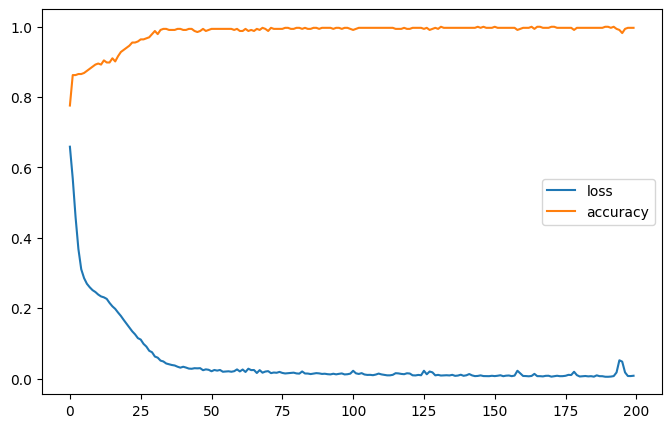

In [149]:
pd.DataFrame(results.history).plot(figsize=(8,5))
plt.show()

In [150]:
score = model.evaluate(X_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

6/6 [==============================] - 0s 2ms/step - loss: 0.0385 - accuracy: 0.9879
Test score: 0.03846234083175659
Test accuracy: 0.9878787994384766


In [159]:
from sklearn import metrics
y_pred = model.predict(X_test, verbose=0) > 0.5
# .reshape(1, -1)[0]
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[77  2]
 [ 0 86]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        79
           1       0.98      1.00      0.99        86

    accuracy                           0.99       165
   macro avg       0.99      0.99      0.99       165
weighted avg       0.99      0.99      0.99       165



In [1]:
print(len(y))
print(len(x[:, 0]))

print(len(y_pred))
print(len(X_test))

NameError: name 'y' is not defined

In [ ]:
K = 2
# Plot clusters of data points
def plot_clusters(k, data, colors, title = 'Default title'):
    plt.figure(figsize = (8, 6))
    for i in range(0, k):    
        plt.scatter(
            x[data == i, 0], x[data == i, 1],
            s = 20, c = colors[i],
            label=f'Cluster {i + 1}'
        )
    plt.legend(scatterpoints = 1)
    plt.title(title)
    plt.show()
    
def n_colors(n = 1):
    c = []
    for i in range(0, n):
        c.append([np.random.rand(3,)])
    return c

plt_color = n_colors(K)
plot_clusters(K, y_pred, colors = plt_color, title = 'Predicted clusters')
plot_clusters(K, y_test, colors = plt_color, title = 'Actual clusters')